# Balls Image Classification


### Contents
1. Abstract
2. Dataset
3. Model
4. Importing required libraries and Dataset
5. Exploratory Data analysis and Data Visualization
6. Classification Model using Neural Networks
    * Define the model
    - Deploy the model
    - Classification report
7. Observation
8. Conclusion

*******************************



### Dataset
The dataset which is used here, is collected from Kaggle website. Here is the link of the dataset : https://www.kaggle.com/gpiosenka/balls-image-classification.

### Goal
The goal of this project is to make a deep learning model which will classify the images of different types of balls using the convoolution neural network, to be precise the MobileNet architecture.
******************************************


### Importing required libraries and Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sn
import cv2

import glob

### Define the paths for train, test and validation datasets

In [3]:
base_path = "../Dataset"

train_dir = "../Dataset/train"
test_dir = "../Dataset/test"
val_dir = "../Dataset/valid"

In [4]:
df = pd.read_csv("../Dataset/balls.csv")

## Exploratory Data Analysis and Data Visualization
Exploratory Data Analysis(EDA): Exploratory data analysis is a complement to inferential statistics, which tends to be fairly rigid with rules and formulas. At an advanced level, EDA involves looking at and describing the data set from different angles and then summarizing it.

Data Analysis: Data Analysis is the statistics and probability to figure out trends in the data set. It is used to show historical data by using some analytics tools. It helps in drilling down the information, to transform metrics, facts, and figures into initiatives for improvement.

**1. Total no. of images**

In [5]:
print(f"Total number of imgaes -- > {len(df)}")

Total number of imgaes -- > 3311


**2. Number of train, test and validation sets**

In [6]:
data_count = df['data set'].value_counts()

In [7]:
print(f"Number of training images --> {data_count[0]}")
print(f"Number of testing images --> {data_count[1]}")
print(f"Number of validation images --> {data_count[2]}")

Number of training images --> 3051
Number of testing images --> 130
Number of validation images --> 130


**3. Share the train, test and validation images**

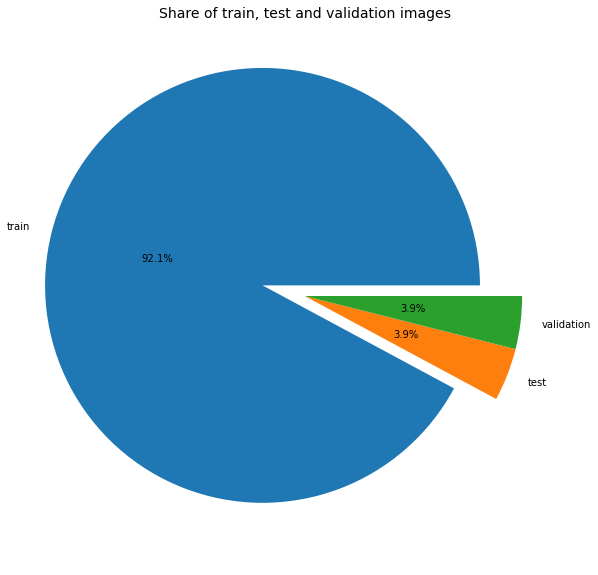

In [8]:
plt.figure(figsize=(15, 10))
plt.pie(x=np.array([data_count[0], data_count[1], data_count[2]]), autopct="%.1f%%", explode=[0.2,0, 0], labels=["train", "test", "validation"], pctdistance=0.5)
plt.title("Share of train, test and validation images", fontsize=14);

### Observation : 
Training images comprise 92.1% of the total images

**4. Classes of the balls**

In [9]:
ball_classes = os.listdir(train_dir)

In [10]:
len(ball_classes)

26

**Observation** : There are 26 classes in the dataset

In [11]:
train_images = glob.glob(f"{train_dir}/*/*.jpg")
test_images = glob.glob(f"{test_dir}/*/*.jpg")
val_images = glob.glob(f"{val_dir}/*/*.jpg")

**5. Number of different types of images available**

In [12]:
class_dict = {}
for clas in ball_classes:
    num_items = len(os.listdir(os.path.join(train_dir, clas)))
    class_dict[clas] = num_items

In [13]:
class_dict

{'baseball': 112,
 'basketball': 116,
 'beachballs': 92,
 'billiard ball': 143,
 'bowling ball': 145,
 'brass': 113,
 'buckeyballs': 82,
 'cannon ball': 183,
 'cricket ball': 150,
 'eyeballs': 139,
 'football': 112,
 'golf ball': 106,
 'marble': 131,
 'meat ball': 137,
 'medicine ball': 77,
 'paint balls': 32,
 'pokeman balls': 86,
 'puffballs': 106,
 'screwballs': 140,
 'soccer ball': 167,
 'tennis ball': 139,
 'tether ball': 105,
 'volley ball': 131,
 'water polo ball': 139,
 'wiffle ball': 99,
 'wrecking ball': 69}

**6. Plotting the types of balls v/s no. of the balls**

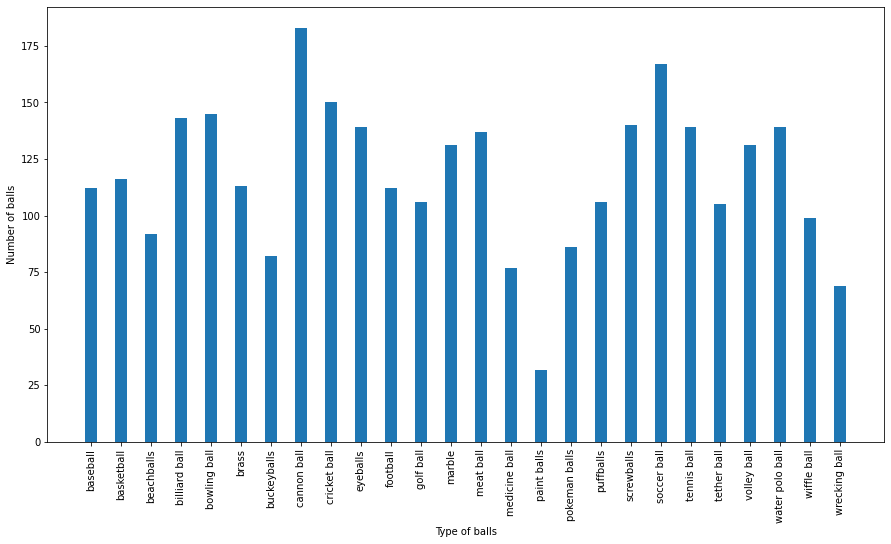

In [14]:
plt.figure(figsize=(15,8))
plt.bar(list(class_dict.keys()), list(class_dict.values()), width=0.4,align="center" )
plt.xticks(rotation=90)

plt.xlabel("Type of balls")
plt.ylabel("Number of balls")
plt.show()

**Observation** : 
<p style="font-size: 1.5rem"> <em>Paint balls</em> have the least number of images whereas <em>cannon balls</em> the highest </p>

### Plotting different images

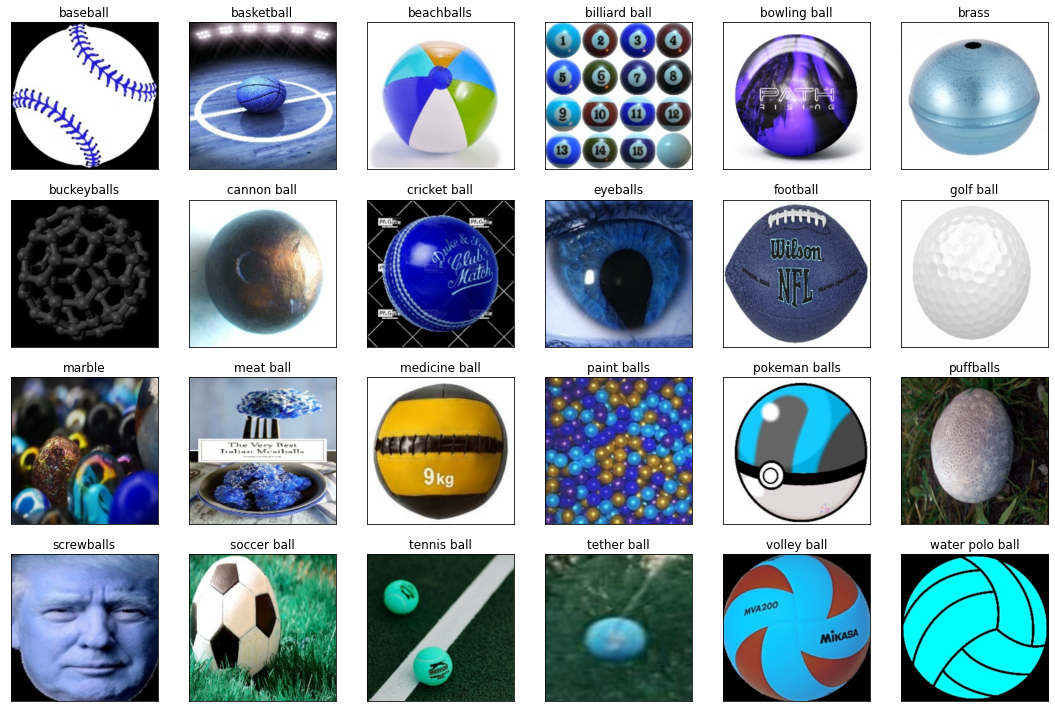

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i,ax in enumerate(axes.flat):
    images = os.listdir(os.path.join(train_dir, ball_classes[i]))
    img = cv2.imread(os.path.join(train_dir, ball_classes[i], images[i]))
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title(ball_classes[i])
fig.tight_layout()    
plt.show()

### Creating Image Generators

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255.,)
test_datagen = ImageDataGenerator(rescale = 1./255.,)


train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20, class_mode='categorical', target_size = (220, 220))
validation_generator = val_datagen.flow_from_directory(val_dir, batch_size=20, class_mode = 'categorical', target_size=(220, 220))
test_generator = test_datagen.flow_from_directory(test_dir,shuffle=False, batch_size=20, class_mode = 'categorical', target_size=(220, 220))

Found 3051 images belonging to 26 classes.
Found 130 images belonging to 26 classes.
Found 130 images belonging to 26 classes.


In [17]:
input_shape = (220, 220, 3)

*******************
## Classification Model Creation using Neural Network
The Classification algorithm is a Supervised Learning technique that is used to identify the category of new observations on the basis of training data. In Classification, a program learns from the given dataset or observations and then classifies new observation into a number of classes or groups. Such as, Yes or No, 0 or 1, Spam or Not Spam, cat or dog, etc. Classes can be called as targets/labels or categories.

Unlike regression, the output variable of Classification is a category, not a value, such as "Green or Blue", "fruit or animal", etc. Since the Classification algorithm is a Supervised learning technique, hence it takes labeled input data, which means it contains input with the corresponding output.

Neural Network : Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

Now let's talk about the particular architecture that we are going to use here. The **MobileNet architecture** is going to be used here! 

### MobileNetV2 Architecture : 
MobileNetV2 is a convolutional neural network architecture that seeks to perform well on mobile devices. It is based on an inverted residual structure where the residual connections are between the bottleneck layers. MobileNetV2 is a general architecture and can be used for multiple use cases. Depending on the use case, it can use different input layer size and different width factors. This allows different width models to reduce the number of multiply-adds and thereby reduce inference cost on mobile devices.

Let's deploy the model!


***************
### Define the model

In [18]:
# define the model
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', input_shape=input_shape, include_top=False)

for layer in base_model.layers:
    layer.trainable = False
    
    
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(26, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 128)               1

### Model Training

In [19]:
model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=["accuracy"])

#callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch = 100, epochs=30)

Epoch 1/30
100/100 [==============================] - 83s 733ms/step - loss: 1.4459 - accuracy: 0.6102 - val_loss: 0.5794 - val_accuracy: 0.8077
Epoch 2/30
100/100 [==============================] - 62s 613ms/step - loss: 0.5515 - accuracy: 0.8312 - val_loss: 0.3074 - val_accuracy: 0.8846
Epoch 3/30
100/100 [==============================] - 64s 641ms/step - loss: 0.4292 - accuracy: 0.8775 - val_loss: 0.2825 - val_accuracy: 0.8923
Epoch 4/30
100/100 [==============================] - 66s 655ms/step - loss: 0.3163 - accuracy: 0.9056 - val_loss: 0.3563 - val_accuracy: 0.9000
Epoch 5/30
100/100 [==============================] - 68s 676ms/step - loss: 0.3134 - accuracy: 0.9055 - val_loss: 0.2541 - val_accuracy: 0.9308
Epoch 6/30
100/100 [==============================] - 53s 523ms/step - loss: 0.2694 - accuracy: 0.9220 - val_loss: 0.3042 - val_accuracy: 0.9231
Epoch 7/30
100/100 [==============================] - 51s 511ms/step - loss: 0.2248 - accuracy: 0.9325 - val_loss: 0.0942 - val_ac

### Accuracy Checking Metrics

In [20]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

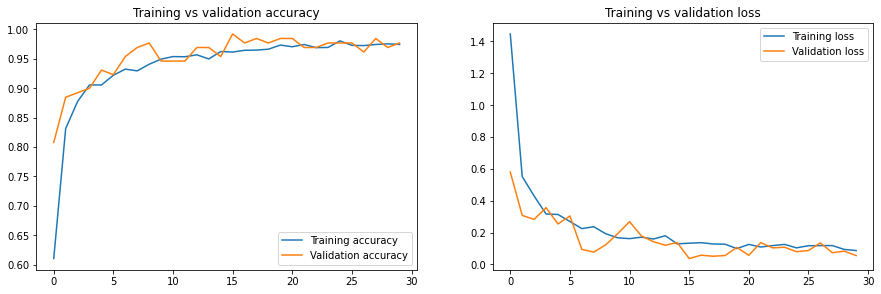

In [21]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

### Predicting the images using the deployed model

In [22]:
pred = model.predict(test_generator)

In [23]:
pred

array([[1.00000000e+00, 1.04308315e-19, 1.69426076e-26, ...,
        5.40431350e-25, 5.24353118e-20, 2.09924265e-16],
       [1.00000000e+00, 2.41804712e-17, 2.66754609e-23, ...,
        9.38066877e-23, 4.54838546e-19, 3.96724059e-15],
       [1.00000000e+00, 5.10172327e-21, 8.82119026e-33, ...,
        9.72855958e-31, 1.54094985e-24, 1.58599203e-19],
       ...,
       [5.82578669e-24, 1.53301579e-18, 8.35572120e-25, ...,
        5.58446744e-24, 4.58516881e-23, 1.00000000e+00],
       [8.58988595e-22, 1.08684102e-14, 1.41059513e-18, ...,
        4.56808632e-19, 9.86355702e-19, 1.00000000e+00],
       [7.27204107e-27, 2.55127285e-22, 8.05285139e-28, ...,
        5.87251610e-29, 1.81861281e-26, 1.00000000e+00]], dtype=float32)

In [24]:
y_pred = np.argmax(pred, axis=1)

In [25]:
y_pred_class = dict((v,k) for k,v in test_generator.class_indices.items())
    

In [26]:
y_pred_class

{0: 'baseball',
 1: 'basketball',
 2: 'beachballs',
 3: 'billiard ball',
 4: 'bowling ball',
 5: 'brass',
 6: 'buckeyballs',
 7: 'cannon ball',
 8: 'cricket ball',
 9: 'eyeballs',
 10: 'football',
 11: 'golf ball',
 12: 'marble',
 13: 'meat ball',
 14: 'medicine ball',
 15: 'paint balls',
 16: 'pokeman balls',
 17: 'puffballs',
 18: 'screwballs',
 19: 'soccer ball',
 20: 'tennis ball',
 21: 'tether ball',
 22: 'volley ball',
 23: 'water polo ball',
 24: 'wiffle ball',
 25: 'wrecking ball'}

In [27]:
y_pred

array([ 0,  0,  0,  0,  0,  1,  1,  1, 10,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13,
       13, 13, 14, 14, 10, 14, 14, 15, 15, 15, 15, 15, 16,  5, 16, 16, 16,
       17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20,
       20, 20, 20, 21, 21, 21, 21, 21, 22, 23, 22, 22, 22, 22, 23, 23, 23,
       23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25], dtype=int64)

In [28]:
y_pred = list(map(lambda x: y_pred_class[x], y_pred))

In [29]:
y_pred

['baseball',
 'baseball',
 'baseball',
 'baseball',
 'baseball',
 'basketball',
 'basketball',
 'basketball',
 'football',
 'basketball',
 'beachballs',
 'beachballs',
 'beachballs',
 'beachballs',
 'beachballs',
 'billiard ball',
 'billiard ball',
 'billiard ball',
 'billiard ball',
 'billiard ball',
 'bowling ball',
 'bowling ball',
 'bowling ball',
 'bowling ball',
 'bowling ball',
 'brass',
 'brass',
 'brass',
 'brass',
 'brass',
 'buckeyballs',
 'buckeyballs',
 'buckeyballs',
 'buckeyballs',
 'buckeyballs',
 'cannon ball',
 'cannon ball',
 'cannon ball',
 'cannon ball',
 'cannon ball',
 'cricket ball',
 'cricket ball',
 'cricket ball',
 'cricket ball',
 'cricket ball',
 'eyeballs',
 'eyeballs',
 'eyeballs',
 'eyeballs',
 'eyeballs',
 'football',
 'football',
 'football',
 'football',
 'football',
 'golf ball',
 'golf ball',
 'golf ball',
 'golf ball',
 'golf ball',
 'marble',
 'marble',
 'marble',
 'marble',
 'marble',
 'meat ball',
 'meat ball',
 'meat ball',
 'meat ball',
 'meat

In [30]:
y_true = test_generator.classes

In [31]:
y_true = list(map(lambda x: y_pred_class[x], y_true))

### Classification Report for the Model
A Classification report is used to measure the quality of predictions from a classification algorithm. The report shows the main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and false positives, true and false negatives.

In [32]:
print(classification_report(y_true, y_pred))

                 precision    recall  f1-score   support

       baseball       1.00      1.00      1.00         5
     basketball       1.00      0.80      0.89         5
     beachballs       1.00      1.00      1.00         5
  billiard ball       1.00      1.00      1.00         5
   bowling ball       1.00      1.00      1.00         5
          brass       0.83      1.00      0.91         5
    buckeyballs       1.00      1.00      1.00         5
    cannon ball       1.00      1.00      1.00         5
   cricket ball       1.00      1.00      1.00         5
       eyeballs       1.00      1.00      1.00         5
       football       0.71      1.00      0.83         5
      golf ball       1.00      1.00      1.00         5
         marble       1.00      1.00      1.00         5
      meat ball       1.00      1.00      1.00         5
  medicine ball       1.00      0.80      0.89         5
    paint balls       1.00      1.00      1.00         5
  pokeman balls       1.00    

In [33]:
results = model.evaluate(test_generator)

7/7 [==============================] - 3s 477ms/step - loss: 0.2778 - accuracy: 0.9615


********************************
### Observation from the model
* The model deployed here is using the architecture called MobileNetV2.
* It is a neural network model architecture, mainly used for the images classification.
* The model shows a recall of 1.00
* The model shows f1 score of 1.00
* The model shows precision of 1.00
* Talking about the accuracy score, the model shows the accuracy of 0.96 or, 96%
* The model also shows the macro average of 0.96 and weighted average of 0.96.
*************************************
## Conclusion
* Images classification is one of the trending models in the recent times.
* Using of Convolution Neural Network for classifying the images, made the model to easlily deployable.
* The MobileNetV2 architecture has the special ability to classify the images from the dataset and predict the correct images.
* As the model provides an accuuracy score of 96%, for me it is the final model for this project
* Hence, **MobileNetV2 Architecture** is the best model for this dataset to deploy the classification model.
***********************************

